# Instructions for running this code:
##### This code can be run normally. However: 
* Certain cells take an extremely long time to run (mainly at the end). They have been commented out. Some parts are just directly loaded in from work we've done before in the other files.
* You may need to input your own kaggle information into kaggle.json, as well as your own Anthropic API Key

In [1]:
%reset -f

In [2]:
!pip uninstall numpy -y
!pip install numpy==2.1.0
!pip install kaggle anthropic scikit-learn bertopic umap umap-learn gensim pandas sentence-transformers matplotlib seaborn

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-2.1.0-cp310-cp310-macosx_14_0_arm64.whl.metadata (60 kB)
Using cached numpy-2.1.0-cp310-cp310-macosx_14_0_arm64.whl (5.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.1.0 which is incompatible.
  Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.0
    Uninstalling numpy-2.1.0:
      Successfully uninstalled numpy-2.1.0


In [3]:
!kaggle datasets download Cornell-University/arxiv

Traceback (most recent call last):
  File "/Users/jeanlaurent/miniconda3/envs/arxiv-new/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/Users/jeanlaurent/miniconda3/envs/arxiv-new/lib/python3.10/site-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
  File "/Users/jeanlaurent/miniconda3/envs/arxiv-new/lib/python3.10/site-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
  File "/Users/jeanlaurent/miniconda3/envs/arxiv-new/lib/python3.10/site-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
KeyError: 'username'


In [4]:
import zipfile

with zipfile.ZipFile("arxiv.zip","r") as reference:
    reference.extractall()

In [5]:
import pandas as pd

#took ~8mins to run
df = pd.read_json("arxiv-metadata-oai-snapshot.json", lines = True)

In [6]:
original_df = df.copy()

In [7]:
df.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


In [8]:
df.shape

(2700231, 14)

In [9]:
#no need to drop rows with nulls for these columns since they are not very relevant
df.isna().sum()

id                      0
submitter           15189
authors                 0
title                   0
comments           698741
journal-ref       1814063
doi               1467846
report-no         2515655
categories              0
license            452787
abstract                0
versions                0
update_date             0
authors_parsed          0
dtype: int64

In [10]:
(df=="None").sum()

id                 0
submitter          0
authors            0
title              0
comments          43
journal-ref        0
doi                0
report-no          1
categories         0
license            0
abstract           0
versions           0
update_date        0
authors_parsed     0
dtype: int64

In [11]:
import ast

df.replace("None", pd.NA, inplace=True)

#Remove unwanted characters in Authors column
df["authors"] = df["authors"].str.replace(r"\\'", "'", regex=True)
#Split multiple values in categories into lists
df["categories"]= df["categories"].str.split()
#Parse versions
df["versions"] = df["versions"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
#Convert update_date to datetime
df["update_date"]=pd.to_datetime(df["update_date"])


In [12]:
df.shape

(2700231, 14)

# BERTopic & Topic Modelling

In [ ]:
import pickle
import numpy as np
from bertopic import BERTopic

model = BERTopic.load("arxiv2")

with open("kmeans_clustering.pkl", "rb") as f:
    clustering_model = pickle.load(f)

# with open("embeddings.pkl", "rb") as f:
#     embeddings = pickle.load(f)

with open("new_labels.pkl", "rb") as f:
    new_labels = pickle.load(f)

topics = np.load("topics.npy", allow_pickle=True)
probabilities = np.load("probabilities.npy", allow_pickle=True)

/Users/jeanlaurent/miniconda3/envs/arxiv-new/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
import logging
logging.basicConfig(level=logging.INFO)

In [ ]:
from transformers import *
from sklearn.cluster import KMeans
import anthropic
from umap.umap_ import UMAP
from sklearn.metrics.pairwise import cosine_distances
import pandas as pd
from tqdm import tqdm
import numpy as np
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sentence_transformers import SentenceTransformer
import torch
from bertopic import BERTopic

df["input_text"] = (df["title"]+". "+df["abstract"]).astype(str)
listed_input_text = df["input_text"].tolist()


In [18]:
len(listed_input_text)

2700231

In [ ]:
sentence_transformer = SentenceTransformer("all-MiniLM-L12-v2")
embeddings = sentence_transformer.encode(listed_input_text, batch_size=32, show_progress_bar=True)

In [20]:
from sklearn.preprocessing import normalize
embeddings = normalize(embeddings)

In [21]:
embeddings.shape

(2700231, 384)

In [ ]:
# # # Stopword removal is done automatically in the vectorizer below:

# clustering_model = KMeans(n_clusters=50, random_state=27)
# vectorizer_model = CountVectorizer(stop_words="english", max_features=1000, ngram_range=(1, 2))
# model = BERTopic(verbose=True, hdbscan_model=clustering_model, vectorizer_model=vectorizer_model)

# topics, probabilities = model.fit_transform(listed_input_text, embeddings=embeddings)

In [23]:
topics_df = model.get_topic_info()

In [ ]:
import anthropic

client = anthropic.Anthropic(api_key="")

new_labels = []
for i in range(0, 50, 10):
    topics_set = topics_df["Name"].iloc[i:i+10].tolist()

    prompt = f"""
    I will give you lists of keywords. Please give a concise and descriptive label that summarizes each set.
    When deciding on a label, give more emphasis to keywords that appear earlier in the list.
    The earlier a keyword appears, the more important it is to the topic.

    {topics_set}
    
    Response format:
    Label 
    Label
    Label
    ....
    
    Do not include anything else in your response except the labels in this format:
    """

    message = client.messages.create(
        model="claude-3-7-sonnet-20250219",
        max_tokens=600,
        temperature=0.5,
        system="Be a domain expert in the field of general research who is knowledgeable and descriptive, but concise.",
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": prompt.strip()
                    }
                ]
            }
        ]
    )

    new_labels.append(message.content[0].text.strip().split("\n"))


INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"


In [29]:
new_labels = [label for twod in new_labels for label in twod]

In [30]:
new_labels

['Deep Learning and Neural Networks',
 'Large Language Models and Learning',
 'Group Theory and Algebraic Structures',
 'Language Data and AI Systems',
 'Galaxies and Stellar Astronomy',
 'Data Analysis and Algorithm Performance',
 'Neural Network Learning and Graph Training',
 'Astrophysical Emissions and Observations',
 'Optimization Algorithms and Problem Solving',
 'Graph Theory and Finite Mathematics',
 'Graphene Optical Materials',
 'Mathematical Spaces and Functions',
 'Particle Collisions and Neutrino Production',
 'Graph Algorithms',
 'Magnetic and Superconducting Properties',
 'Quantum Topological States',
 'Communication Channel Performance',
 'Quantum Chromodynamics',
 'Network Analysis and Control',
 'Quantum Magnetic States',
 'Security Software Paper Design',
 'Manifolds and Spaces in Mathematics',
 'Equations and Solutions',
 'Quantum Phase Transport',
 'Dynamics and Phase Transitions',
 'Data Modeling and Estimation',
 'Gauge Theory and String Theory',
 'Algebraic Stru

In [31]:
len(new_labels)

50

In [32]:
topics_df["New Label"] = new_labels

In [33]:
topics_df.head(10)

,Topic,Count,Name,Representation,Representative_Docs,New Label
0,0,99250,0_learning_deep_training_neural,"[learning, deep, training, neural, models, ima...",[GEN Model: An Alternative Approach to Deep Ne...,Deep Learning and Neural Networks
1,1,93820,1_language_models_llms_learning,"[language, models, llms, learning, dataset, ta...",[FDLLM: A Text Fingerprint Detection Method fo...,Large Language Models and Learning
2,2,88754,2_group_groups_algebras_prove,"[group, groups, algebras, prove, algebra, fini...",[Generalized double affine Hecke algebras of r...,Group Theory and Algebraic Structures
3,3,77331,3_language_data_llms_ai,"[language, data, llms, ai, models, information...",[SePer: Measure Retrieval Utility Through The ...,Language Data and AI Systems
4,4,76142,4_galaxies_stars_galaxy_stellar,"[galaxies, stars, galaxy, stellar, star, emiss...",[Type Ia Supernova host galaxies as seen with ...,Galaxies and Stellar Astronomy
5,5,69280,5_data_performance_algorithm_network,"[data, performance, algorithm, network, resear...",[Learning-based Handover in Mobile Millimeter-...,Data Analysis and Algorithm Performance
6,6,68898,6_learning_neural_graph_training,"[learning, neural, graph, training, networks, ...",[Decentralized and Lifelong-Adaptive Multi-Age...,Neural Network Learning and Graph Training
7,7,67431,7_emission_xray_observations_stars,"[emission, xray, observations, stars, radio, s...",[High angular resolution observations towards ...,Astrophysical Emissions and Observations
8,8,64641,8_algorithm_optimization_problem_algorithms,"[algorithm, optimization, problem, algorithms,...",[Distributed Mirror Descent for Online Composi...,Optimization Algorithms and Problem Solving
9,9,63308,9_graphs_graph_number_finite,"[graphs, graph, number, finite, set, prove, co...",[Realizability problem for commuting graphs. ...,Graph Theory and Finite Mathematics


In [46]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import random

articles = random.sample(listed_input_text, 10000)

case_folded = [a.lower().split() for a in articles]

best_keywords = []
for topic_id in model.get_topics().keys():
    if topic_id != -1:
        best_keywords.append([w for w, _ in model.get_topic(topic_id)[:10]])

genism_dict = Dictionary(case_folded)
coherence_model = CoherenceModel(
    topics = best_keywords,
    texts=case_folded,
    dictionary=genism_dict,
    processes=1
)
print(coherence_model.get_coherence())


INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>
INFO:gensim.corpora.dictionary:built Dictionary<102502 unique tokens: ['182.5', '20', '45.6', 'a', 'accelerate']...> from 10000 documents (total 1531921 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<102502 unique tokens: ['182.5', '20', '45.6', 'a', 'accelerate']...> from 10000 documents (total 1531921 corpus positions)", 'datetime': '2025-04-06T22:09:44.503073', 'gensim': '4.3.1', 'python': '3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:35:25) [Clang 16.0.6 ]', 'platform': 'macOS-14.6-arm64-arm-64bit', 'event': 'created'}
INFO:gensim.topic_coherence.probability_estimation:using WordOccurrenceAccumulator to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:WordOccurrenceAccumulator accumulated stats from 1000 documents
INFO:gensim.topic_coherence.text_analysis:WordOccurrenceAccumulator accumulated stats from 200

0.6242985363162621


In [47]:
df["date_created"] = pd.to_datetime(df["versions"].apply(lambda x:x[0]["created"]))
df["Year"] = df["date_created"].dt.year
df["Month"] = df["date_created"].dt.month

In [48]:
df["Year"].value_counts().head(5)

Year
2024    243687
2023    209223
2022    185987
2021    181599
2020    178275
Name: count, dtype: int64

In [49]:
df["Year"].value_counts().tail(5)

Year
1991    353
1990     26
1989      6
1988      1
1986      1
Name: count, dtype: int64

In [51]:
df["topic"] = topics

In [52]:
topics_df.head()

,Topic,Count,Name,Representation,Representative_Docs,New Label
0,0,99250,0_learning_deep_training_neural,"[learning, deep, training, neural, models, ima...",[GEN Model: An Alternative Approach to Deep Ne...,Deep Learning and Neural Networks
1,1,93820,1_language_models_llms_learning,"[language, models, llms, learning, dataset, ta...",[FDLLM: A Text Fingerprint Detection Method fo...,Large Language Models and Learning
2,2,88754,2_group_groups_algebras_prove,"[group, groups, algebras, prove, algebra, fini...",[Generalized double affine Hecke algebras of r...,Group Theory and Algebraic Structures
3,3,77331,3_language_data_llms_ai,"[language, data, llms, ai, models, information...",[SePer: Measure Retrieval Utility Through The ...,Language Data and AI Systems
4,4,76142,4_galaxies_stars_galaxy_stellar,"[galaxies, stars, galaxy, stellar, star, emiss...",[Type Ia Supernova host galaxies as seen with ...,Galaxies and Stellar Astronomy


In [ ]:
topics_df[["Count", "New Label"]]

,Count,New Label
0,99250,Deep Learning and Neural Networks
1,93820,Large Language Models and Learning
2,88754,Group Theory and Algebraic Structures
3,77331,Language Data and AI Systems
4,76142,Galaxies and Stellar Astronomy
5,69280,Data Analysis and Algorithm Performance
6,68898,Neural Network Learning and Graph Training
7,67431,Astrophysical Emissions and Observations
8,64641,Optimization Algorithms and Problem Solving
9,63308,Graph Theory and Finite Mathematics


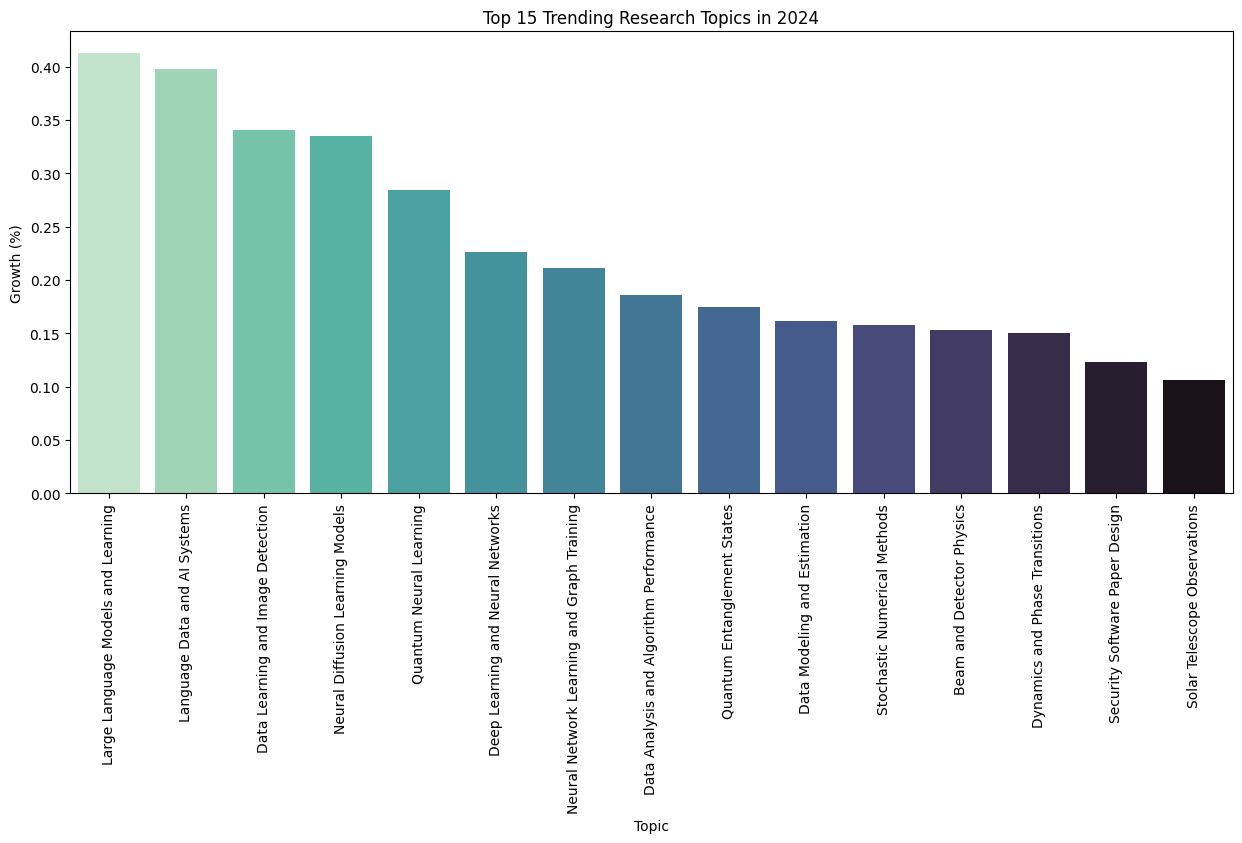

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

topic_year_grouped_df = (
    df.groupby(["Year", "topic"])
    .agg(count=("topic", "count")).reset_index()
)

topic_year_grouped_df["percent_change"] = topic_year_grouped_df.groupby("topic")["count"].pct_change()

growing_df = (topic_year_grouped_df[topic_year_grouped_df["Year"] == 2024]
    .sort_values("percent_change", ascending=False)
    .head(15)
)

new_labels_dict = {l: label for l, label in enumerate(new_labels)}
growing_df["topic"] = growing_df["topic"].map(new_labels_dict)
plt.figure(figsize=(15, 6))
sns.barplot(x="topic", y="percent_change", data=growing_df, palette="mako_r")
plt.title("Top 15 Trending Research Topics in 2024")
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Topic")
plt.ylabel("Growth (%)")
plt.show()

In [55]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities = cosine_similarity(model.topic_embeddings_)

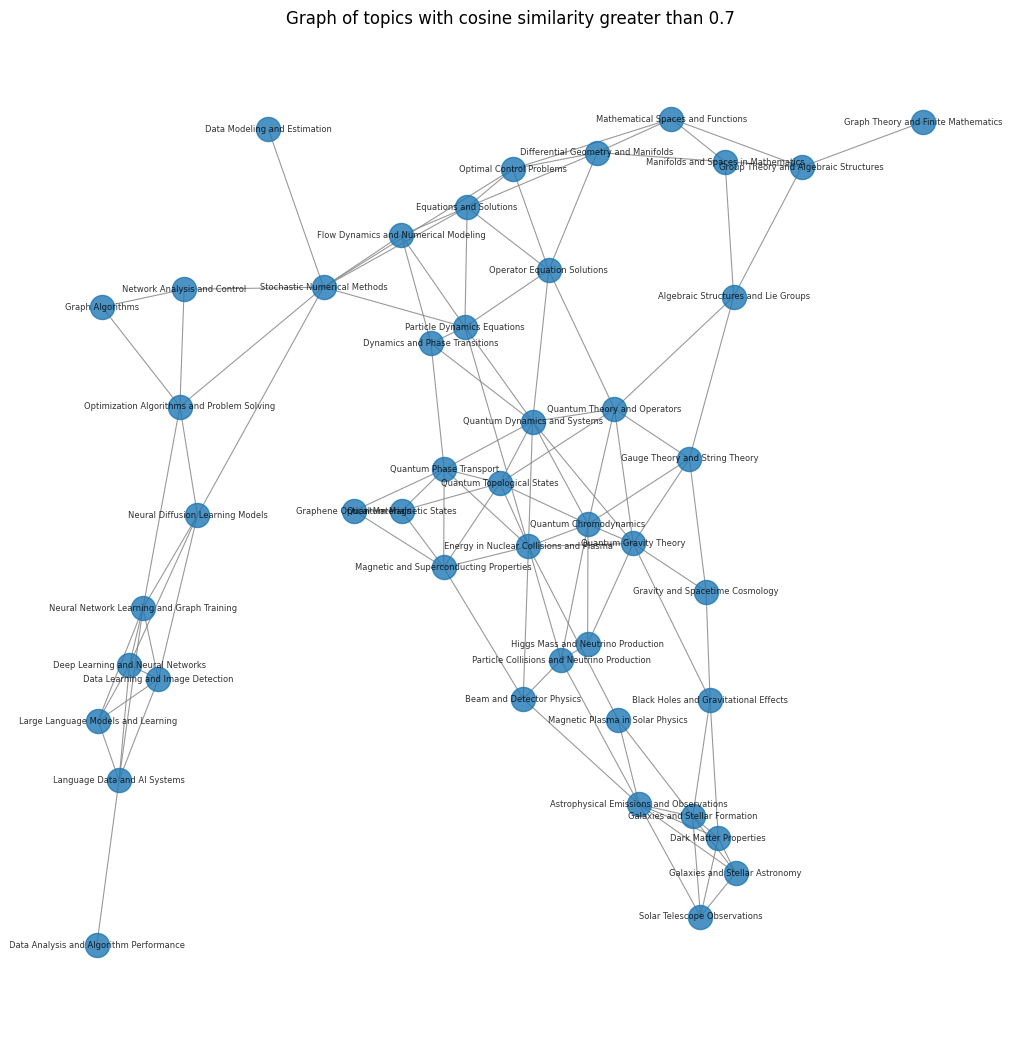

In [56]:
import networkx as nx
import numpy as np

G = nx.Graph()
threshold = 0.7
row_indice, column_indice = np.triu_indices_from(cosine_similarities, k=1)

for r, c in zip(row_indice, column_indice):
    if cosine_similarities[r, c] > threshold:
        G.add_edge(r, c, weight=cosine_similarities[r, c])

G = nx.relabel_nodes(G, new_labels_dict)
position = nx.spring_layout(G, k=0.08, seed=10)

plt.figure(figsize=(10, 10))
nx.draw(G, position, width=0.8, alpha=0.8, edge_color='gray', font_size=6, node_size=300, with_labels=True)
plt.title("Graph of topics with cosine similarity greater than 0.7")
plt.tight_layout()
plt.show()